In [2]:
!uv pip install \
    matplotlib==3.10.6 \
    seaborn==0.13.2 \
    scikit-learn==1.7.1


Resolved 19 packages in 68ms                                         
Installed 16 packages in 444ms                              
 + contourpy==1.3.3
 + cycler==0.12.1
 + fonttools==4.59.2
 + joblib==1.5.2
 + kiwisolver==1.4.9
 + matplotlib==3.10.6
 + numpy==2.3.2
 + pandas==2.3.2
 + pillow==11.3.0
 + pyparsing==3.2.3
 + pytz==2025.2
 + scikit-learn==1.7.1
 + scipy==1.16.1
 + seaborn==0.13.2
 + threadpoolctl==3.6.0
 + tzdata==2025.2


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()

housing.data.shape

(20640, 8)

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target
)

print(X_train.shape)
print(X_test.shape)

(15480, 8)
(5160, 8)


In [ ]:
def get_r_squared(k=9):
    train_score = []
    test_score = []
    models = []

    for neighbors in range(1, k + 1):
        model = KNeighborsRegressor(n_neighbors=neighbors)

        model.fit(X_train, y_train)

        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))

        models.append(model)

    return train_score, test_score, models

In [ ]:
train_score, test_score, models = get_r_squared()

In [ ]:
train_score

[1.0,
 0.6997642271304491,
 0.5801419067217667,
 0.5001977481232421,
 0.44405507627322427,
 0.4071493868910271,
 0.37615810372027225,
 0.3538219340506408,
 0.33289385252928283]

In [ ]:
test_score

[-0.18468155435295963,
 0.05415067113622163,
 0.10010913447909664,
 0.13119830694246115,
 0.13637041065267874,
 0.14462073364655825,
 0.14970859505022693,
 0.14688816811671124,
 0.1482739618013098]

In [ ]:
# Examining performance for k=6
print(f"Training r2 for 6 neighbors: {train_score[5]:.2f}")
print(f"Testing r2 for 6 neighbors: {test_score[5]:.2f}")

Training r2 for 6 neighbors: 0.41
Testing r2 for 6 neighbors: 0.14


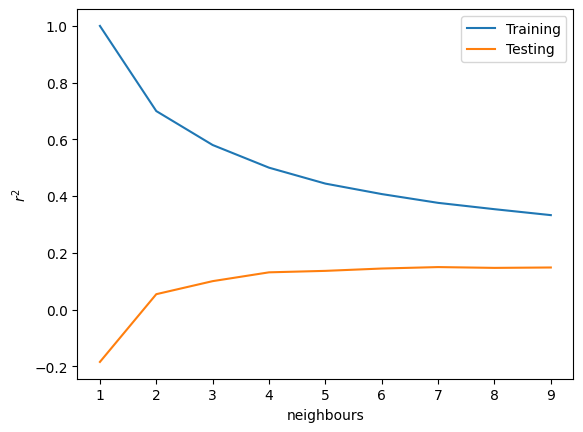

In [ ]:
k = range(1, 10)
plt.plot(k, train_score, label="Training")
plt.plot(k, test_score, label="Testing")
plt.xlabel("neighbours")
plt.ylabel("$r^2$")
plt.legend()
plt.show()

In [ ]:
def get_r_squared_scaled(k=9):
    train_score = []
    test_score = []
    models = []
    for neighbors in range(1, k + 1):
        model = make_pipeline(
            StandardScaler(), KNeighborsRegressor(n_neighbors=neighbors)
        )
        model.fit(X_train, y_train)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))
        models.append(model)
    return train_score, test_score, models

In [ ]:
train_score, test_score, models = get_r_squared_scaled()

In [ ]:
# Examining performance for k=6
print(f"Training r2 for 6 neighbors: {train_score[5]:.2f}")
print(f"Testing r2 for 6 neighbors: {test_score[5]:.2f}")

Training r2 for 6 neighbors: 0.79
Testing r2 for 6 neighbors: 0.71
